# Algoritmos de predicción

A partir del clustering realizado a la información de eventos adquiridos en Clipp Eventos, se realizará el modelo de predicción basado en dos escenarios de prueba:

* Busqueda de predicción sobre variables específicas.
* Predicción basada en todas las variables de del conjunto.

Los clusters que estan definidos se han interpretado en estos 4 grupos de tipos de eventos mas populares:

* 0 -> Eventos de feria
* 1 -> Teatro (Artes Vivas)
* 2 -> Otros
* 3 -> Deportes

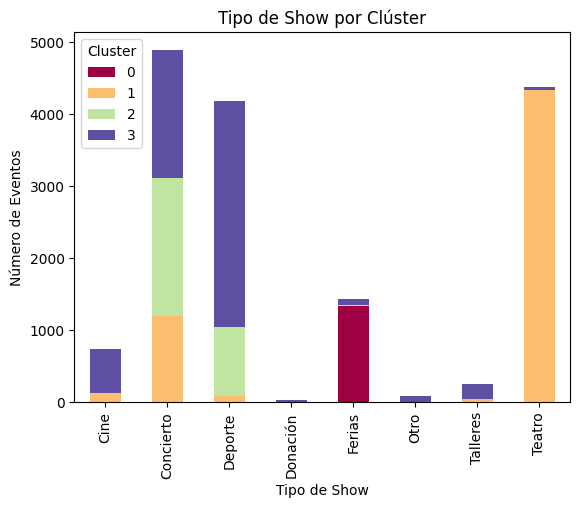

Ademas tambien se interpretan desde el punto de vista de agrupacion de clientes segun el nivel de fidelidad de los usuarios:

* 0 -> Adquisicion de pocas entradas en una temporada especifca y nulas en el resto del tiempo.
* 1 -> Adquisicion de muchas entradas en una temporada especifca y nulas en el resto del tiempo.
* 2 -> Adquisicion moderada de entradas en una temporada especifca y nulas en el resto del tiempo.
* 3 -> Adquisicion consistente de entradas a lo largo del tiempo.

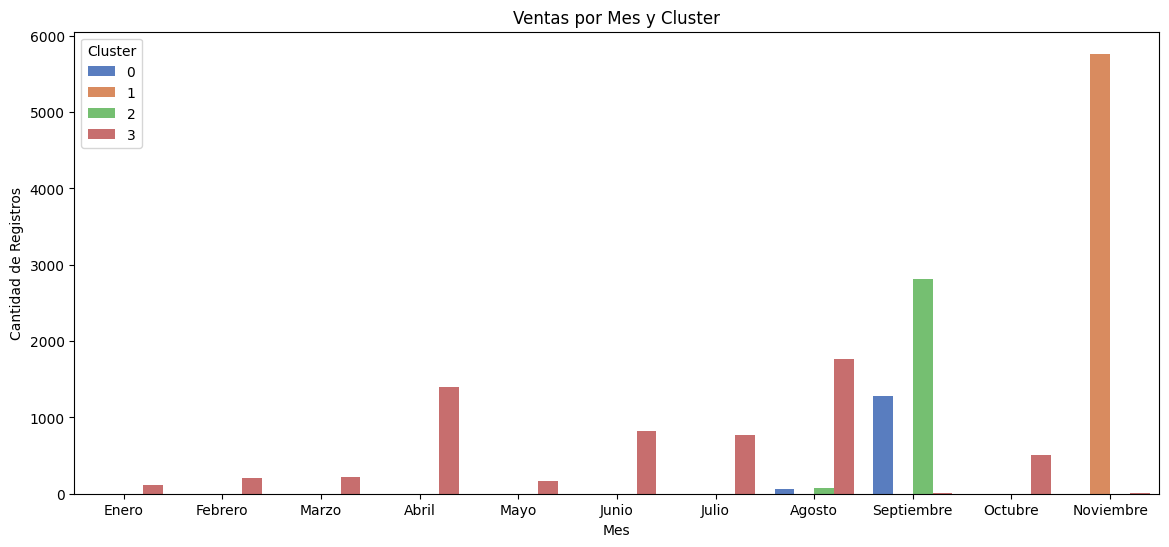

In [1]:
# Imports basicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

In [2]:
# Eliminar warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Unificar en un solo conjunto conjunto de datos codificados y clusters
df_coded = pd.read_csv('data_encoded.csv')
df_clusters = pd.read_csv('data_with_clusters.csv')

In [4]:
# Añadir la columna clusters de df_clusters a df_coded
df_coded['Cluster'] = df_clusters['Cluster']

In [ ]:
df_coded

,Total Boletos,Estado de Pago,EsCompartido,Forma de Pago_AppExterna,Forma de Pago_PayPhone,Forma de Pago_Wallet,TipoShow_Cine,TipoShow_Concierto,TipoShow_Deporte,TipoShow_Donación,...,Mes_Show_Junio,Mes_Show_Marzo,Mes_Show_Mayo,Mes_Show_Noviembre,Mes_Show_Octubre,Mes_Show_Septiembre,Periodo_Show_Mañana,Periodo_Show_Noche,Periodo_Show_Tarde,Cluster
0,0.000000,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,3
1,0.020408,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,3
2,0.000000,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,3
3,0.000000,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,3
4,0.000000,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15984,0.020408,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
15985,0.020408,1,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
15986,0.020408,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
15987,0.020408,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


## Variables especificas

### Predicción sobre Total Boletos (Regresion Lineal)

Buscar predecir cuantos boletos podría adquirir una persona que pertenece a un grupo específico de cluster.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que 'total_boletos' es la columna objetivo
X = df_coded.drop(columns=['Total Boletos'])  # Características (incluye 'clusters')
y = df_clusters['Total Boletos']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.3344476260316864
R-squared: 0.21201969519492136


El modelo explica aproximadamente el 21% de la varianza en los datos. Esto sugiere que el modelo no está capturando toda la complejidad de los datos y podría mejorarse. Compararemos Mean Square con los resultados que obtengamos con el entrenamiento de red neuronal

### Predicción sobre Total Boletos (Red Neuronal)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

# Definir el modelo de red neuronal (perceptrón multicapa)
model = Sequential()

# Capa de entrada con la cantidad de características escaladas
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Capa oculta 1
model.add(Dropout(0.2))  # Regularización Dropout
model.add(Dense(32, activation='relu'))  # Capa oculta 2
model.add(Dropout(0.2))  # Regularización Dropout
model.add(Dense(1))  # Capa de salida (1 salida para regresión)

# Compilar el modelo con un optimizador Adam ajustado
optimizer = Adam(learning_rate=0.001)  # Ajustar tasa de aprendizaje
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo con más épocas y EarlyStopping para evitar sobreajuste
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluar el modelo con el conjunto de prueba
mse, mae = model.evaluate(X_test, y_test, verbose=0)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R²: {r2}')

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error (MSE): 1.8812386989593506
Mean Absolute Error (MAE): 0.9276989698410034
R²: 0.5554349422454834


En este caso obtenemos resultados ligeramente superiores como que el Mean Square pasa de 3.33 a 1.82 y el modelo ahora explca el 56% de los datos con una mejora muy significativa con respecto a la regresion lineal por lo tanto este algoritmo será mucho mas útil para predecir la compra de boletos de un evento por parte de un usuario

In [ ]:
# Exportamos el modelo
# Guardar el modelo completo en un archivo .h5
model.save('modelo_prediccion_totalBoletos.h5')

<br>

---

<br>

### Prediccion sobre TipoShow (RandomForest)

In [ ]:
# Eliminar todas las columnas que contienen 'TipoShow' en su nombre
df_mod = df_coded.drop(columns=[col for col in df_coded.columns if 'TipoShow' in col])

# Verificar el DataFrame después de eliminar las columnas
print(df_mod.head())

   Total Boletos  Estado de Pago  EsCompartido  Forma de Pago_AppExterna  \
0       0.000000               1             1                         0   
1       0.020408               1             0                         0   
2       0.000000               1             1                         0   
3       0.000000               1             1                         0   
4       0.000000               1             1                         0   

   Forma de Pago_PayPhone  Forma de Pago_Wallet  Nombre Localidad 1    Show 1  \
0                       0                     1           -0.524377 -0.060704   
1                       0                     1           -0.524377 -0.060704   
2                       0                     1           -0.524377 -0.060704   
3                       0                     1           -0.524377 -0.060704   
4                       0                     1           -0.524377 -0.060704   

   Día_Domingo  Día_Jueves  ...  Mes_Show_Junio  Mes_Sho

In [ ]:
df_mod['TipoShow'] = df_clusters['TipoShow']
df_mod.head()

,Total Boletos,Estado de Pago,EsCompartido,Forma de Pago_AppExterna,Forma de Pago_PayPhone,Forma de Pago_Wallet,Nombre Localidad 1,Show 1,Día_Domingo,Día_Jueves,...,Mes_Show_Marzo,Mes_Show_Mayo,Mes_Show_Noviembre,Mes_Show_Octubre,Mes_Show_Septiembre,Periodo_Show_Mañana,Periodo_Show_Noche,Periodo_Show_Tarde,Cluster,TipoShow
0,0.000000,1,1,0,0,1,-0.524377,-0.060704,0,1,...,1,0,0,0,0,0,0,1,3,Otro
1,0.020408,1,0,0,0,1,-0.524377,-0.060704,0,1,...,1,0,0,0,0,0,0,1,3,Otro
2,0.000000,1,1,0,0,1,-0.524377,-0.060704,0,1,...,1,0,0,0,0,0,0,1,3,Otro
3,0.000000,1,1,0,0,1,-0.524377,-0.060704,0,1,...,1,0,0,0,0,0,0,1,3,Otro
4,0.000000,1,1,0,0,1,-0.524377,-0.060704,0,1,...,1,0,0,0,0,0,0,1,3,Otro


In [ ]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [ ]:
# Separar caracteristicas de entrada de etiqueta de salida
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [ ]:
# Dividir el conjunto
train_set, val_set, test_set = train_val_test_split(df_mod)

# Separar las caracteristicas de la etiqueta
x_train, y_train = remove_labels(train_set, 'TipoShow')
x_val, y_val = remove_labels(val_set, 'TipoShow')
x_test, y_test = remove_labels(test_set, 'TipoShow')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenaremos 100 arboles de decision aleatorios a partir de nuestro conjunto de datos
model_rforest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_rforest.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import f1_score

# Predecir con el conjunto de entrenamiento
y_train_pred = model_rforest.predict(x_train)

# Exactitud con el conjunto de entrenamiento
f_score = f1_score(y_train_pred, y_train, average='weighted')
print(f'La exactitud del random forest es del {round(f_score * 100, ndigits=2)} %')

La exactitud del random forest es del 99.99 %


In [ ]:
# Predecir con el conjunto de validadcion
y_val_pred = model_rforest.predict(x_val)

# Exactitud con el conjunto de validacion
f_score = f1_score(y_val_pred, y_val, average='weighted')
print(f'La exactitud del random forest es del {round(f_score * 100, ndigits=2)} %')

La exactitud del random forest es del 99.54 %


In [ ]:
# Predecir con el conjunto de testeo
y_test_pred = model_rforest.predict(x_test)

# Exactitud con el conjunto de validacion
f_score = f1_score(y_test_pred, y_test, average='weighted')
print(f'La exactitud del random forest es del {round(f_score * 100, ndigits=2)} %')

La exactitud del random forest es del 99.63 %


Podría haber un potencial overfitting en el modelo por lo que no seria recomendable este algoritmo para nuestra solucion

### Prediccion sobre TipoShow (Regresión Logística)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir el modelo
log_reg = LogisticRegression(max_iter=1000)

# Entrenar el modelo
log_reg.fit(x_train, y_train)

# Hacer predicciones
y_pred = log_reg.predict(x_val)

# Calcular las métricas
# Exactitud con el conjunto de validacion
f_score = f1_score(y_pred, y_val, average='weighted')
print(f'La exactitud de la regresión logística es del {round(f_score * 100, ndigits=2)} %')

La exactitud de la regresión logística es del 87.47 %


In [ ]:
# Hacer predicciones para el conjunto de pruebas
y_pred = log_reg.predict(x_train)

f_score = f1_score(y_pred, y_train, average='weighted')
print(f'La exactitud de la regresión logística es del {round(f_score * 100, ndigits=2)} %')

La exactitud de la regresión logística es del 87.86 %


### Prediccion sobre TipoShow (SVM)

In [ ]:
from sklearn.svm import SVC

# Definir el modelo SVM
svm_model = SVC(kernel='linear', probability=True)

# Entrenar el modelo
svm_model.fit(x_train, y_train)

# Hacer predicciones
y_pred = svm_model.predict(x_val)

# Calcular las métricas
# Exactitud con el conjunto de validacion
f_score = f1_score(y_pred, y_val, average='weighted')
print(f'La exactitud del SVM es del {round(f_score * 100, ndigits=2)} %')

La exactitud del SVM es del 88.76 %


In [ ]:
# Hacer predicciones con el conjunto de pruebas
y_pred = svm_model.predict(x_test)

# Calcular las métricas
# Exactitud con el conjunto de validacion
f_score = f1_score(y_pred, y_test, average='weighted')
print(f'La exactitud del SVM es del {round(f_score * 100, ndigits=2)} %')

La exactitud del SVM es del 88.77 %


In [ ]:
# Guardamos el modelo puesto que es el que mejores resultados han ofrecido
import joblib

# Guardar el modelo en un archivo .pkl
joblib.dump(svm_model, 'modelo_prediccion_tipoShow.pkl')

['modelo_prediccion_tipoShow.pkl']

## Conclusion

Para prediccion de regresion lineal de la variable *Total Boletos* las redes neuronales funcionaron mejor pues explican un 56% de los datos con respecto al 21% de la regresion lineal clasica.

Por parte de la prediccion clasificadora para la variable *TipoShow* el algoritmo que mejores resultados da y los mas realistas es el de Support Vector Machine SVM puesto que da un resultado de exactitud general del 88.7% con respecto al 87.5% de la regresión logística o el 99% del sobreajuste de random forest.

Con estos dos modelos podemos predecir cuantos boletos compraría un determinado cliente para un evento y que tipo de evento adquiriría un cliente de ciertas preferencias.

## Todas las variables

Usar el modelo de clustering que se genero previamente en el analisis de clustering para que pueda determinar a que clustering puede pertenecer un ejemplo en concreto, ademas de hacer ejemplos con los modelos que usamos para buscar predicciones sobre variables específicas **Total Boletos** y **TipoShow** respectivamente.

In [ ]:
# Mostrar 10 registros aleatorios
df_clusters.sample(n=10)

,Show,Total Boletos,Nombre Localidad,Forma de Pago,Estado de Pago,EsCompartido,TipoShow,Mes,Día,Periodo,Mes_Show,Día_Show,Periodo_Show,Cluster
6928,Noches de Feria Los Nocheros,2,BOLETO GENERAL,Wallet,1,0,Concierto,Septiembre,Miércoles,Mañana,Septiembre,Sábado,Noche,2
14643,MEDEAS,2,PLATEA MEDIA,AppExterna,1,0,Teatro,Noviembre,Viernes,Noche,Noviembre,Martes,Noche,1
12376,Mar perdido,10,BOLETO GENERAL,Wallet,1,1,Teatro,Noviembre,Jueves,Tarde,Noviembre,Jueves,Mañana,1
8298,Noches de Feria Los Nocheros,2,BOLETO GENERAL,PayPhone,1,0,Concierto,Septiembre,Sábado,Noche,Septiembre,Sábado,Noche,2
6248,ALZATE,2,BOLETO GENERAL,PayPhone,0,0,Concierto,Septiembre,Jueves,Noche,Septiembre,Jueves,Noche,2
2546,INTENSAMENTE 2,4,SALA 1 3D,Wallet,1,0,Cine,Junio,Jueves,Tarde,Junio,Viernes,Noche,3
7435,Noches de Feria Los Nocheros,2,BOLETO GENERAL,PayPhone,0,0,Concierto,Septiembre,Sábado,Mañana,Septiembre,Sábado,Noche,2
11041,Jazz concert,2,BOLETO GENERAL,PayPhone,1,0,Teatro,Noviembre,Miércoles,Tarde,Noviembre,Miércoles,Noche,1
12388,Sensa 20,10,GENERAL,Wallet,1,1,Teatro,Noviembre,Jueves,Mañana,Noviembre,Miércoles,Mañana,1
2823,JORGE GUZMAN VS CC MANABI,1,CORTESÍAS,Wallet,1,1,Deporte,Junio,Viernes,Tarde,Junio,Lunes,Noche,3


### Caso de ejemplo

Este caso de ejemplo pertenece a un usuario que ha usado Clipp eventos y ha realizado las siguientes acciones que nos permitirán determinar a segmento de usuario puede pertenecer.

* **Show**: MOANA 2
* **Total Boletos**: 2
* **Nombre Localidad**: SALA 1 2D
* **Forma de Pago**: PayPhone
* **Estado de Pago**: 1
* **EsCompartido**: 0
* **TipoShow**: Cine
* **Mes**: Diciembre
* **Día**: Jueves
* **Periodo**: Tarde
* **Mes_Show**: Diciembre
*	**Día_Show**: Jueves
*	**Periodo_Show**: Tarde

In [ ]:
# DF del ejemplo de prueba
ejemplo = pd.DataFrame({
    'Show': ['MOANA 2'],
    'Total Boletos': [2],
    'Nombre Localidad': ['SALA 1 2D'],
    'Forma de Pago': ['PayPhone'],
    'Estado de Pago': [1],
    'EsCompartido': [0],
    'TipoShow': ['Cine'],
    'Mes': ['Diciembre'],
    'Día': ['Jueves'],
    'Periodo': ['Tarde'],
    'Mes_Show': ['Diciembre'],
    'Día_Show': ['Jueves'],
    'Periodo_Show': ['Tarde']
})

### Establecer los modelos de escalado y codificacion

Para que la prediccion funcione tenemos que codificar y escalar la informacion de la misma manera que se hizo durante el proceso de entrenamiento del algoritmo.

Para ello se usará el escalador usado para la columna Total Boletos y un Pipeline con todo el proceso de escalado + codificacion para las columnas categoricas

##### Columna numérica (Total Boletos)

In [ ]:
# Leer el modelo de escalado para Total Boletos
import pickle

with open('totalBoletos_scaler.pkl', 'rb') as file:
    escalador_TotalBoletos = pickle.load(file)

print(escalador_TotalBoletos)

MinMaxScaler()


In [ ]:
ejemplo_prep = ejemplo.copy()

# Escalar Total Boletos de nuestro ejemplo con el modelo escalador importado
ejemplo_prep['Total Boletos'] = escalador_TotalBoletos.transform(ejemplo_prep[['Total Boletos']])
ejemplo_prep

,Show,Total Boletos,Nombre Localidad,Forma de Pago,Estado de Pago,EsCompartido,TipoShow,Mes,Día,Periodo,Mes_Show,Día_Show,Periodo_Show
0,MOANA 2,0.020408,SALA 1 2D,PayPhone,1,0,Cine,Diciembre,Jueves,Tarde,Diciembre,Jueves,Tarde


##### Columnas Categóricas

In [5]:
# DF con la data base sin la columna Cluster
df_base = df_clusters.drop(columns=['Cluster'])
df_base.head(5)

,Show,Total Boletos,Nombre Localidad,Forma de Pago,Estado de Pago,EsCompartido,TipoShow,Mes,Día,Periodo,Mes_Show,Día_Show,Periodo_Show
0,TARDE CLIPP,1,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
1,TARDE CLIPP,2,SALA 3,Wallet,1,0,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
2,TARDE CLIPP,1,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
3,TARDE CLIPP,1,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde
4,TARDE CLIPP,1,SALA 3,Wallet,1,1,Otro,Enero,Jueves,Tarde,Marzo,Viernes,Tarde


In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import json

# Definir las columnas categóricas pequeñas y grandes
categorical_small = ['Forma de Pago', 'TipoShow', 'Mes', 'Día', 'Periodo', 'Mes_Show', 'Día_Show', 'Periodo_Show']
categorical_large = ['Show', 'Nombre Localidad']

# Pipeline para las columnas categóricas pequeñas (OneHot)
small_cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # No cambiamos nada aquí
])

# Pipeline para las columnas categóricas grandes (OneHot + Escalado + PCA)
large_cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),  # OneHotEncoding
    ('scaler', RobustScaler()),  # Escalado
    ('pca', PCA(n_components=2))  # PCA
])

# Crear el ColumnTransformer con las transformaciones para las columnas pequeñas y grandes
preprocessor = ColumnTransformer(
    transformers=[
        ('small_cat', small_cat_transformer, categorical_small),
        ('large_cat', large_cat_transformer, categorical_large)
    ],
    remainder='passthrough'  # Mantener el resto de las columnas sin cambios
)

# Aplicar el preprocesamiento al conjunto de datos original (df_base)
df_base_transformed = preprocessor.fit_transform(df_base)

# Obtener los nombres de las columnas generadas por el OneHotEncoder
small_cat_columns = preprocessor.transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_small)
large_cat_columns = [f"{col} {i+1}" for col in categorical_large for i in range(1)]  # Ajustar componentes si es necesario

# Obtener las columnas restantes no transformadas
remaining_columns = df_base.drop(columns=categorical_small + categorical_large).columns

# Combinamos todas las columnas transformadas y no transformadas
columns_transformed = list(small_cat_columns) + list(large_cat_columns) + list(remaining_columns)

# Convertir el resultado en un DataFrame con las columnas combinadas
df_transformed = pd.DataFrame(df_base_transformed, columns=columns_transformed)

# Convertir las columnas del OneHotEncoder a enteros (en lugar de flotantes)
for col in small_cat_columns:
    df_transformed[col] = df_transformed[col].astype(int)

# Guardar el pipeline para futuros usos
joblib.dump(preprocessor, 'preprocesador.pkl')

# Guardar los nombres de las columnas transformadas
with open('columns_transformed.json', 'w') as f:
    json.dump(columns_transformed, f)

In [7]:
# Ver el DataFrame transformado con valores enteros en las columnas OneHotEncoded
df_transformed.head()

,Forma de Pago_AppExterna,Forma de Pago_PayPhone,Forma de Pago_Wallet,TipoShow_Cine,TipoShow_Concierto,TipoShow_Deporte,TipoShow_Donación,TipoShow_Ferias,TipoShow_Otro,TipoShow_Talleres,...,Día_Show_Sábado,Día_Show_Viernes,Periodo_Show_Mañana,Periodo_Show_Noche,Periodo_Show_Tarde,Show 1,Nombre Localidad 1,Total Boletos,Estado de Pago,EsCompartido
0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,-0.527107,-0.131407,1.0,1.0,1.0
1,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,-0.527107,-0.131407,2.0,1.0,0.0
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,-0.527107,-0.131407,1.0,1.0,1.0
3,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,-0.527107,-0.131407,1.0,1.0,1.0
4,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,-0.527107,-0.131407,1.0,1.0,1.0


##### Usar el preprocesador para nuevos ejemplos

In [ ]:
preprocessor = joblib.load('preprocesador.pkl')

# Cargar los nombres de las columnas transformadas
with open('columns_transformed.json', 'r') as f:
    columns_transformed = json.load(f)

# Preprocesar el ejemplo
ejemplo_prep = preprocessor.transform(ejemplo_prep)
ejemplo_df = pd.DataFrame(ejemplo_prep, columns=columns_transformed)

# Primero, seleccionamos las columnas que NO se deben convertir
columns_to_exclude = ['Show 1', 'Nombre Localidad 1', 'Total Boletos']

# Identificar las columnas que deben ser transformadas a enteros
columns_int = [col for col in ejemplo_df.columns if col not in columns_to_exclude]

# Convertir todas las columnas que no están en 'columns_to_exclude' a enteros
ejemplo_df[columns_int] = ejemplo_df[columns_int].astype(int)

In [ ]:
# Lista de las columnas que deben ir al inicio en el orden que deseas
columnas_inicio = ['Total Boletos', 'Estado de Pago', 'EsCompartido',
                   'Forma de Pago_AppExterna', 'Forma de Pago_PayPhone',
                   'Forma de Pago_Wallet', 'TipoShow_Cine', 'TipoShow_Concierto',
                   'TipoShow_Deporte', 'TipoShow_Donación', 'TipoShow_Ferias',
                   'TipoShow_Otro', 'TipoShow_Talleres', 'TipoShow_Teatro',
                   'Nombre Localidad 1', 'Show 1', 'Día_Domingo', 'Día_Jueves',
                   'Día_Lunes', 'Día_Martes', 'Día_Miércoles', 'Día_Sábado',
                   'Día_Viernes', 'Mes_Abril', 'Mes_Agosto', 'Mes_Enero',
                   'Mes_Febrero', 'Mes_Julio', 'Mes_Junio', 'Mes_Marzo', 'Mes_Mayo',
                   'Mes_Noviembre', 'Mes_Octubre', 'Mes_Septiembre', 'Periodo_Mañana',
                   'Periodo_Noche', 'Periodo_Tarde', 'Día_Show_Domingo', 'Día_Show_Jueves',
                   'Día_Show_Lunes', 'Día_Show_Martes', 'Día_Show_Miércoles', 'Día_Show_Sábado',
                   'Día_Show_Viernes', 'Mes_Show_Abril', 'Mes_Show_Agosto', 'Mes_Show_Diciembre',
                   'Mes_Show_Febrero', 'Mes_Show_Julio', 'Mes_Show_Junio', 'Mes_Show_Marzo',
                   'Mes_Show_Mayo', 'Mes_Show_Noviembre', 'Mes_Show_Octubre', 'Mes_Show_Septiembre',
                   'Periodo_Show_Mañana', 'Periodo_Show_Noche', 'Periodo_Show_Tarde']

# Las columnas que no están en columnas_inicio
columnas_restantes = [col for col in ejemplo_df.columns if col not in columnas_inicio]

# Añadir la columna 'Cluster' al final si está presente en el DataFrame
columnas_restantes.append('Cluster') if 'Cluster' in ejemplo_df.columns else None

# Reorganizar las columnas en el orden deseado
nuevo_orden = columnas_inicio + columnas_restantes

# Reordenar el DataFrame
ejemplo_df_reorganizado = ejemplo_df[nuevo_orden]

# Mostrar el DataFrame con el nuevo orden
ejemplo_df_reorganizado.columns

Index(['Total Boletos', 'Estado de Pago', 'EsCompartido',
       'Forma de Pago_AppExterna', 'Forma de Pago_PayPhone',
       'Forma de Pago_Wallet', 'TipoShow_Cine', 'TipoShow_Concierto',
       'TipoShow_Deporte', 'TipoShow_Donación', 'TipoShow_Ferias',
       'TipoShow_Otro', 'TipoShow_Talleres', 'TipoShow_Teatro',
       'Nombre Localidad 1', 'Show 1', 'Día_Domingo', 'Día_Jueves',
       'Día_Lunes', 'Día_Martes', 'Día_Miércoles', 'Día_Sábado', 'Día_Viernes',
       'Mes_Abril', 'Mes_Agosto', 'Mes_Enero', 'Mes_Febrero', 'Mes_Julio',
       'Mes_Junio', 'Mes_Marzo', 'Mes_Mayo', 'Mes_Noviembre', 'Mes_Octubre',
       'Mes_Septiembre', 'Periodo_Mañana', 'Periodo_Noche', 'Periodo_Tarde',
       'Día_Show_Domingo', 'Día_Show_Jueves', 'Día_Show_Lunes',
       'Día_Show_Martes', 'Día_Show_Miércoles', 'Día_Show_Sábado',
       'Día_Show_Viernes', 'Mes_Show_Abril', 'Mes_Show_Agosto',
       'Mes_Show_Diciembre', 'Mes_Show_Febrero', 'Mes_Show_Julio',
       'Mes_Show_Junio', 'Mes_Show_Marzo'

In [ ]:
# Ver el DataFrame transformado y reorganizado
ejemplo_df_reorganizado.head()

,Total Boletos,Estado de Pago,EsCompartido,Forma de Pago_AppExterna,Forma de Pago_PayPhone,Forma de Pago_Wallet,TipoShow_Cine,TipoShow_Concierto,TipoShow_Deporte,TipoShow_Donación,...,Mes_Show_Julio,Mes_Show_Junio,Mes_Show_Marzo,Mes_Show_Mayo,Mes_Show_Noviembre,Mes_Show_Octubre,Mes_Show_Septiembre,Periodo_Show_Mañana,Periodo_Show_Noche,Periodo_Show_Tarde
0,0.020408,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Predecir cluster para ejemplo

In [ ]:
import joblib

# Cargar el modelo KMeans guardado
kmeans_model = joblib.load('kmeans_model.pkl')

# Verificar el tipo de modelo cargado
print(type(kmeans_model))  # Debería ser <class 'sklearn.cluster.KMeans'>

<class 'sklearn.cluster._kmeans.KMeans'>


In [ ]:
clusters_ejemplo = kmeans_model.predict(ejemplo_df_reorganizado)

In [ ]:
print(clusters_ejemplo)

[2]


In [ ]:
ejemplo['Cluster'] = clusters_ejemplo
ejemplo

,Show,Total Boletos,Nombre Localidad,Forma de Pago,Estado de Pago,EsCompartido,TipoShow,Mes,Día,Periodo,Mes_Show,Día_Show,Periodo_Show,Cluster
0,MOANA 2,2,SALA 1 2D,PayPhone,1,0,Cine,Diciembre,Jueves,Tarde,Diciembre,Jueves,Tarde,2


El modelo de clustering predijo para este ejemplo concreto que pertenece a el grupo 2 que se refiere a "Otros" en nuestra segmentación de clustering

### Predecir Total Boletos para ejemplo

Usaremos el modelo generado con redes neuronales para determinar que tan bien puede predecir el total de boletos de nuestro ejemplo

In [ ]:
# Importar modelo de prediccion de Total Boletos
import tensorflow as tf

# Cargar el modelo desde el archivo .h5
modelo_totalBoletos = tf.keras.models.load_model('modelo_prediccion_totalBoletos.h5')

In [ ]:
ejemplo_sin_totalBoletos = ejemplo_df_reorganizado.drop(columns=['Total Boletos'])
ejemplo_sin_totalBoletos['Cluster'] = ejemplo['Cluster']
prediccion_totalBoletos = modelo_totalBoletos.predict(ejemplo_sin_totalBoletos)

prediccion_totalBoletos

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[2.422757]], dtype=float32)

Tal y como podemos observar el modelo ha podido predecir al 100% el Total de Boletos propuesto en nuestro ejemplo con **2.422757** (**2**) boletos.

### Predecir TipoShow para ejemplo

Determinar el nivel de prediccion del modelo SVM y compararlo con nuestro caso de ejemplo

In [ ]:
import joblib

# Cargar el modelo desde el archivo .pkl
modelo_tipoShow = joblib.load('modelo_prediccion_tipoShow.pkl')

In [ ]:
# Eliminar todas las columnas que contienen 'TipoShow' en su nombre
ejemplo_sin_tipoShow = ejemplo_df_reorganizado.drop(columns=[col for col in df_coded.columns if 'TipoShow' in col])
ejemplo_sin_tipoShow['Cluster'] = ejemplo['Cluster']

# Ahora puedes usar el modelo para hacer predicciones
prediccion_tipoShow = modelo_tipoShow.predict(ejemplo_sin_tipoShow)
prediccion_tipoShow

array(['Cine'], dtype=object)

En este caso el modelo SVM predijo al 100% el tipo de show de nuestro ejemplo que es **Cine**